In [1]:
# Импорирую нужные библиотеки.
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np

# Шаг 1. Открыть файл с данными и изучить общую информацию

In [2]:
# Читаю и сохраняю данные в переменные.
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
users = pd.read_csv('users.csv')
tariffs = pd.read_csv('tariffs.csv', index_col='tariff_name') # Здесь я ставлю индексом тариф
# Дальше в функции мне это пригодится.

In [3]:
calls.info()
calls.sample(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
38537,1096_301,2018-06-07,16.26,1096
18769,1051_158,2018-07-06,0.00,1051
147963,1375_794,2018-08-06,11.20,1375
38277,1096_41,2018-12-20,0.00,1096
144869,1365_1,2018-12-27,0.00,1365
99478,1253_78,2018-09-20,17.37,1253
137003,1350_133,2018-12-22,0.00,1350
112242,1289_100,2018-11-22,0.00,1289
74264,1186_86,2018-12-21,0.00,1186
199462,1491_421,2018-11-10,12.56,1491



Тут нет пропущенных значений, но есть звонки по 0.0 минут. Тут возможно ошибка данных из-за очень короткого звонка или дело в проблемах у оператора. Так же надо изменить тип данных в колонке `call_date` с `float64` на `datetime`. Изменить тип данных в  `user_id` c `Int64` на `object`. Округлить звонки в большую сторону т.к оператор всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

In [4]:
internet.info()
internet.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000



Так же тут надо изменить тип данных в `user_id` на `object` . В `session_date` на `datetime`. Округлить `mb_used` . Тут есть один не названный столбец`Unnamed`. Похоже на то, что при переносе данных был скопирован и столбец с индексами. 
Можно объединить данные из таблиц `calls` и `internet` по `user_id`.

In [5]:
messages.info()
messages.sample(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
97414,1399_116,2018-11-28,1399
101336,1414_280,2018-12-13,1414
63381,1277_58,2018-04-16,1277
66047,1282_479,2018-06-12,1282
39067,1167_373,2018-10-01,1167
38464,1166_290,2018-11-19,1166
29493,1127_516,2018-11-12,1127
78561,1330_587,2018-09-03,1330
64920,1280_65,2018-11-20,1280
104204,1424_57,2018-09-02,1424




Так же тут надо изменить тип данных в `user_id` на `object` . В `message_date` на `datetime`

In [6]:
users.info()
users.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Надо изменить тип данных в `user_id` и `age`  на `object`. В  В `reg_date` и `churn_date` на `datetime`

In [7]:
tariffs.info()
tariffs

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, smart to ultra
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   messages_included      2 non-null      int64
 1   mb_per_month_included  2 non-null      int64
 2   minutes_included       2 non-null      int64
 3   rub_monthly_fee        2 non-null      int64
 4   rub_per_gb             2 non-null      int64
 5   rub_per_message        2 non-null      int64
 6   rub_per_minute         2 non-null      int64
dtypes: int64(7)
memory usage: 128.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
tariff_name,,,,,,,
smart,50,15360,500,550,200,3,3
ultra,1000,30720,3000,1950,150,1,1


# Шаг 2. Предобработка данных

Для начала изменю типы данных, округлю минуты и мегабайты. 

Из данных видно, что есть звонки по 0 минут и 0 секунд. Я считаю что звонок был, но человек, которому звонили не взял трубку или был сбой сети, абонент был вне зоны доступа или звонок происходил по бесплатной линии. Из-за этого время звонка 0 секунд. Следовательно, за этот звонок денег не брали. Я уберу 0 секунд и буду считать что до абонента не дозвонились и списания средст не было.

Аналогично с интернетом. Возможно было пере подключение сети или переход на Wi-Fi. Учёта не было и плата не взималась.

In [8]:
# Oкруглил минуты и мб. в большую сторону и перевел в целочисленные т.к оператор отругляет в большую сторону по окончании пользования.
calls['duration'] = np.ceil(calls['duration']).astype(int)
calls = calls[calls['duration'] > 0]
internet['mb_used'] = np.ceil(internet['mb_used']).astype(int)
internet = internet[internet['mb_used'] > 0]

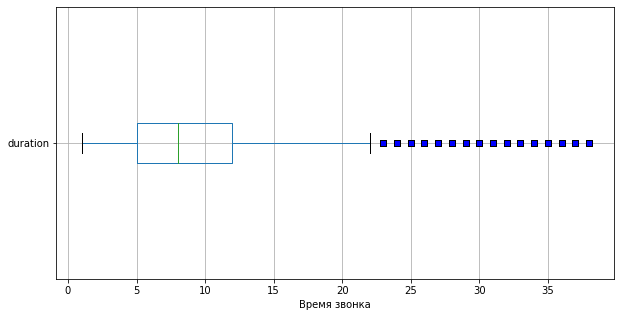

In [9]:
# Посмотрю на данные, есть ли выбросы и соответствуют ли они правде.
calls.boxplot('duration',flierprops=dict(markerfacecolor='b', marker='s'),vert=False, figsize=(10,5))
plt.xlabel('Время звонка')
plt.show()

В среднем звонок длится 8 минут что похоже на правду. Так же есть звонки больше 25 минут. Это могут быть звонки родственникам или по работе.

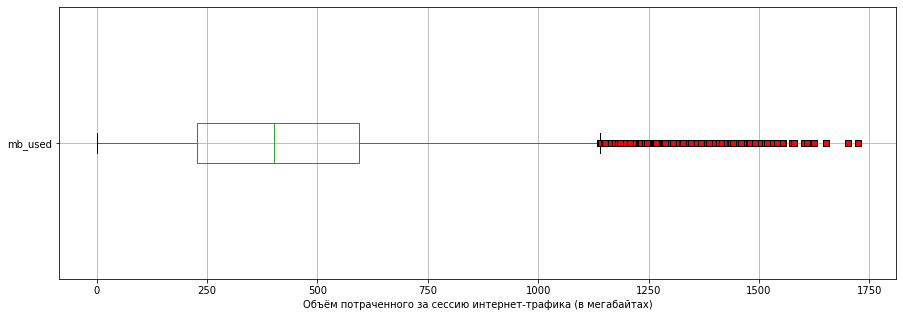

In [10]:
internet.boxplot('mb_used',flierprops=dict(markerfacecolor='r', marker='s'),vert=False, figsize=(15,5))
plt.xlabel('Объём потраченного за сессию интернет-трафика (в мегабайтах)')
plt.show()

Тут то же самое. Данные в норме. Кто-то смотрит фильмы, а кому-то просто полистать соц.сети или посмотреть пару видео на известных ресурсах.

Теперь в данных поставлю корректный тип даты datetime и выведу месяцы в отдельные столбцы и назову их "month".

In [11]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['month'] = calls['call_date'].dt.month

internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet['month'] = internet['session_date'].dt.month

messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages['month'] = messages['message_date'].dt.month

users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

Делаю новый столбец сколько использовали тариф от даты регистрации до закрытия тарифы. 

In [12]:
users['use_tariff_month'] = (users['churn_date'].dt.month - users['reg_date'].dt.month) + 1
# + 1 т.к при подключении или использовании тарифа хоть 1 день он платит за месяц.

Известно что если значение пропущено,то тариф ещё действовал на момент выгрузки данных. Так как у нас данные за 2018г. и мы анализируем только его. То на 01.01.2019г тариф еще действовал и пользователи его оплачивали.

In [13]:
users['use_tariff_month'] = users['use_tariff_month'].fillna(13 - users['reg_date'].dt.month)

#Меняю пропущенные значения на 13 - дата регистрации и ставлю тип int.
users['use_tariff_month'] = users['use_tariff_month'].astype(int)

calls_group = calls.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc='sum').reset_index()

internet_group = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc='sum').reset_index()

messages_group =  messages.pivot_table(index = ['user_id', 'month'], values = 'message_date', aggfunc='count' ).reset_index()

messages_group.columns = ['user_id', 'month', 'messages_in_month'] # Переименую 

In [14]:
# Сделал групировки по id и месяцу.Вывел в отдельные данные тариф, кол-во минут, мегaбайт и смс в месяц.
data = (users[['user_id','tariff']].merge(calls_group, how='outer')
                                     .merge(internet_group, how='outer')
                                     .merge(messages_group, how='outer'))

data.duplicated().sum()# Дубликатов нет

data.head(10)# Вижу пропущенные значения

,user_id,tariff,month,duration,mb_used,messages_in_month
0,1000,ultra,5.0,159.0,2256.0,22.0
1,1000,ultra,6.0,172.0,23257.0,60.0
2,1000,ultra,7.0,340.0,14016.0,75.0
3,1000,ultra,8.0,408.0,14070.0,81.0
4,1000,ultra,9.0,466.0,14581.0,57.0
5,1000,ultra,10.0,350.0,14717.0,73.0
6,1000,ultra,11.0,338.0,14768.0,58.0
7,1000,ultra,12.0,333.0,9827.0,70.0
8,1001,smart,11.0,430.0,18452.0,NaN
9,1001,smart,12.0,414.0,14053.0,NaN


In [15]:
data.isnull().sum() #Смотрю пропущенные значения.

user_id                0
tariff                46
month                  8
duration              54
mb_used               21
messages_in_month    505
dtype: int64

Как видно у меня есть пропуски в тарифе.Это 1% данных.Может быть симка старая или такого тарифа уже давно нет. Возможно симка используется в каком нибудь другом устройстве. Так же есть пропуски в звонках,смс и интернет-трафике. Их я заменю на 0.
Видно что тарифом пользуются. Предположу гипотезу что 70% пропущенных  данных это тариф смарт т.к общее соотношение у нас примерно такое(Как видно из кода ниже)

In [16]:
'Соотношение тарифа смарт к общему количеству {:.0%}'.format(data.query('tariff =="smart"')['tariff'].count() / data['tariff'].count())

'Соотношение тарифа смарт к общему количеству 70%'

In [17]:
#Звонки, мб. и смс меняю на 0
data[['duration','mb_used', 'messages_in_month']] = data[['duration','mb_used', 'messages_in_month']].fillna(0).astype(int)

Тут я расчитаю из пропущенных значений 70% по мб. Всё что ниже будет тариф "смарт" а выше "ультра".

In [18]:
quantile_70 = data[data['tariff'].isnull()]['mb_used'].quantile(.7)

quantile_70

21669.5

In [19]:
data[data['mb_used'] > quantile_70] = data[data['mb_used'] > quantile_70].fillna('ultra') # Меняю значения на ультра

data['tariff'] = data['tariff'].fillna('smart')  # Меняю значения на смарт

data.isnull().sum() # Еще остались пропущенные значение по месяцам. Их я трогать не буду.

user_id              0
tariff               0
month                8
duration             0
mb_used              0
messages_in_month    0
dtype: int64

In [20]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3222 entries, 0 to 3221
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            3222 non-null   int64  
 1   tariff             3222 non-null   object 
 2   month              3214 non-null   float64
 3   duration           3222 non-null   int32  
 4   mb_used            3222 non-null   int32  
 5   messages_in_month  3222 non-null   int32  
dtypes: float64(1), int32(3), int64(1), object(1)
memory usage: 138.4+ KB


,user_id,tariff,month,duration,mb_used,messages_in_month
0,1000,ultra,5.0,159,2256,22
1,1000,ultra,6.0,172,23257,60
2,1000,ultra,7.0,340,14016,75
3,1000,ultra,8.0,408,14070,81
4,1000,ultra,9.0,466,14581,57
5,1000,ultra,10.0,350,14717,73
6,1000,ultra,11.0,338,14768,58
7,1000,ultra,12.0,333,9827,70
8,1001,smart,11.0,430,18452,0
9,1001,smart,12.0,414,14053,0


In [21]:
def get_overpayment(row, tariffs = tariffs):
    """
    Функция считает помесячную выручку с каждого пользователя и кол-во звонков, сообщений и интернет-трафика превышающая лимит.
    """
    
    tariff = row['tariff']   
    
    call_overlimit = max(row['duration'] - tariffs.loc[tariff, 'minutes_included'], 0)
    
    internet_overlimit = max(np.ceil((row['mb_used'] - tariffs.loc[tariff, 'mb_per_month_included'])/1024), 0)
    
    sms_overlimit = max(row['messages_in_month'] - tariffs.loc[tariff, 'messages_included'], 0)
    
    profit = (call_overlimit * tariffs.loc[tariff, 'rub_per_minute'] +
              internet_overlimit * tariffs.loc[tariff, 'rub_per_gb'] +              
              sms_overlimit * tariffs.loc[tariff, 'rub_per_message'] +
              tariffs.loc[tariff, 'rub_monthly_fee'])
    
    return call_overlimit, internet_overlimit, sms_overlimit, profit

# Делаю новые столбцы: кол-во звонков, сообщений и интернет-трафика превышающих лимит и помесячную выручку.
data[['calls_after_limit', 'gb_after_limit', 'sms_after_limit', 'profit']] = data[['tariff', 'duration', 'mb_used', 
'messages_in_month']].apply(get_overpayment, axis = 1, result_type="expand").astype(int)

data.head(10) # Вывожу что получилось

,user_id,tariff,month,duration,mb_used,messages_in_month,calls_after_limit,gb_after_limit,sms_after_limit,profit
0,1000,ultra,5.0,159,2256,22,0,0,0,1950
1,1000,ultra,6.0,172,23257,60,0,0,0,1950
2,1000,ultra,7.0,340,14016,75,0,0,0,1950
3,1000,ultra,8.0,408,14070,81,0,0,0,1950
4,1000,ultra,9.0,466,14581,57,0,0,0,1950
5,1000,ultra,10.0,350,14717,73,0,0,0,1950
6,1000,ultra,11.0,338,14768,58,0,0,0,1950
7,1000,ultra,12.0,333,9827,70,0,0,0,1950
8,1001,smart,11.0,430,18452,0,0,4,0,1350
9,1001,smart,12.0,414,14053,0,0,0,0,550


# Шаг 3. Анализ данных

In [22]:
# Округлил в большую сторону и вывел среднее значение звонков,мегабайт и смс по месяцам и тарифу.
# Так же вывел  средний доход от пользователей в месяц.
np.ceil(data.pivot_table(index=['month'],columns ='tariff',values=['duration','mb_used','messages_in_month','profit'])).astype(int)

duration       mb_used        messages_in_month       profit      
tariff    smart ultra   smart  ultra             smart ultra  smart ultra
month                                                                    
1.0         204   429    8525  13154                19    34    722  1950
2.0         294   311   11431  12258                24    23    823  1977
3.0         391   490   15124  17552                32    33   1165  2015
4.0         361   476   13274  17415                31    33    956  2004
5.0         380   535   15761  19694                34    38   1194  2068
6.0         391   492   15807  19035                34    43   1207  2044
7.0         403   565   15817  20554                35    50   1235  2128
8.0         417   526   16611  19730                34    50   1323  2088
9.0         426   549   16330  19263                34    53   1253  2026
10.0        422   573   16756  20204                34    60   1363  2070
11.0        433   550   16916  19854                35    57   1347  2096
12.0        475   606   18126  21924                36    62   1578  2144

Из этих данных видно что пользователи тарифа "ульта" не переплачивают много сверх тарифа, а вот пользователи "смарт" часто берут доп.

In [23]:
#Вывел среднее за год
np.ceil(data.pivot_table(index=['tariff'],values=['duration','mb_used','messages_in_month','profit'])).astype(int)

,duration,mb_used,messages_in_month,profit
tariff,,,,
smart,414,16192,34,1291
ultra,537,19502,50,2074


Видно что пользователям "смарт" не хватает трафика.Так же видно что в среднем пользователи "ульра" не пользуются тарифом на 100%. Можно предложить еще один тариф.

In [24]:
# Вывел дисперсию звонков,смс и дохода тарифа "ультра" 
np.var(data.query('tariff == "ultra"')[['profit','duration','messages_in_month']])

profit               145735.929949
duration              97388.577521
messages_in_month      2314.589161
dtype: float64

In [25]:
# Отдельно вывел дисперсию мегабайт тарифа "ультра" т.к много знаков.
np.var(data.query('tariff == "ultra"')['mb_used'])

104513033.20625317

In [26]:
# Вывел дисперсию звонков,смс и дохода тарифа "смарт" 
np.var(data.query('tariff == "smart"')[['profit','duration','messages_in_month']])

profit               670069.750773
duration              37776.356346
messages_in_month       795.957525
dtype: float64

In [27]:
# Отдельно вывел дисперсию мегабайт тарифа "смарт" т.к много знаков.
np.var(data.query('tariff == "smart"')['mb_used'])

34772201.25961737

In [28]:
#Вывел стандартное отклонение звонков,мегабайт,смс и дохода по тарифу "ультра"
np.std(data.query('tariff == "ultra"')[['duration','mb_used','messages_in_month','profit']])

duration               312.071430
mb_used              10223.161605
messages_in_month       48.110177
profit                 381.753756
dtype: float64

In [29]:
#Вывел стандартное отклонение звонков,мегабайт,смс и дохода по тарифу "смарт"
np.std(data.query('tariff == "smart"')[['duration','mb_used','messages_in_month','profit']])

duration              194.361407
mb_used              5896.795847
messages_in_month      28.212719
profit                818.577883
dtype: float64

Тут видно что отклонение различаются. У пользователей "ультра" оно выше по всем параметрам кроме `profit`. Видно что пользователи "смарт" берут чаще доп.(как я и говорил выше. Стандартное отклонение "смарт" `profit` больше чем у "ультра").

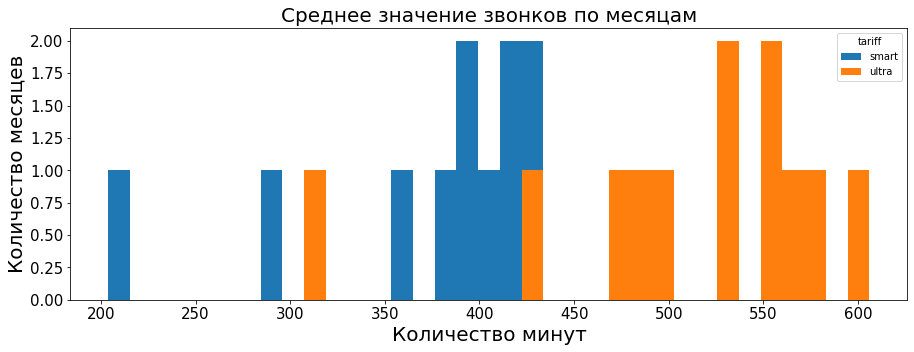

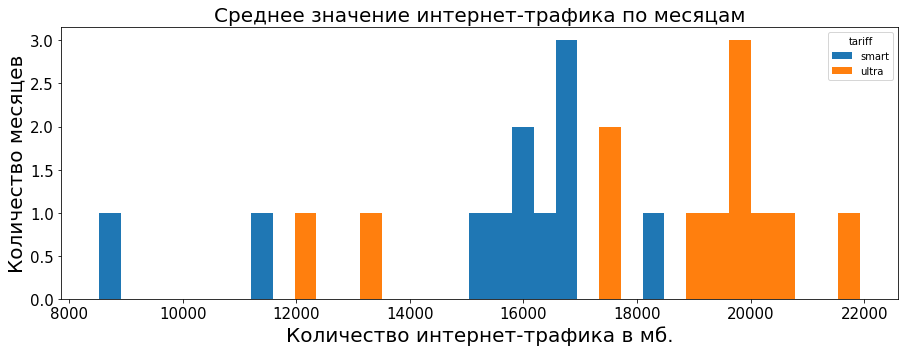

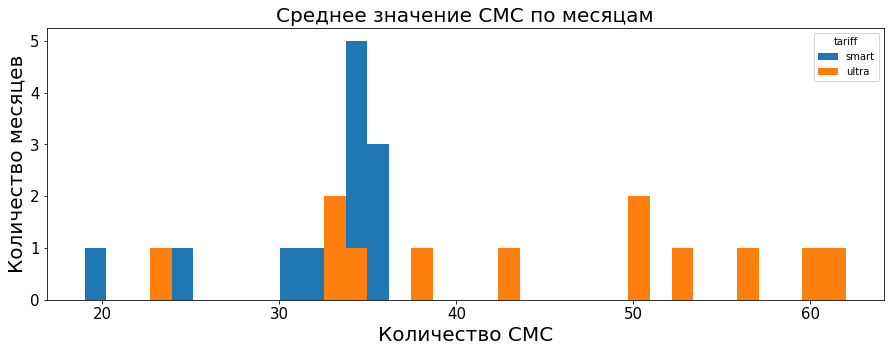

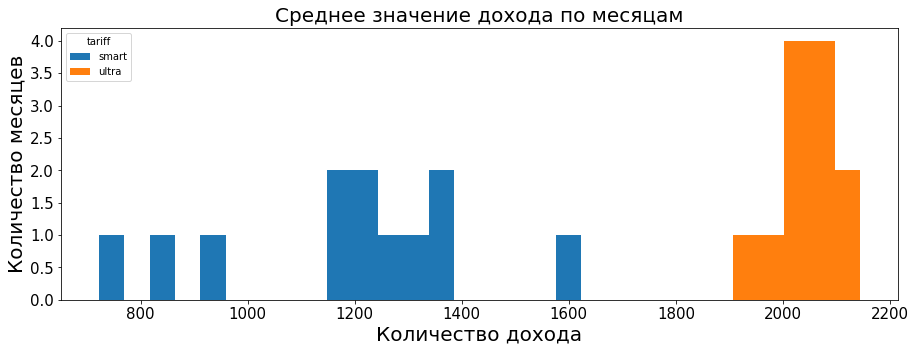

In [30]:
# Строю гистограммы средних значений звонков,мегабайт и смс по месяцам и тарифу. 
np.ceil(data.pivot_table(index=['month'],columns ='tariff',values='duration')).plot(kind="hist",figsize=(15,5),bins=35, fontsize=15 )
plt.title('Cреднее значение звонков по месяцам', fontsize=20)
plt.xlabel('Количество минут', fontsize=20)
plt.ylabel('Количество месяцев', fontsize=20)

np.ceil(data.pivot_table(index=['month'],columns ='tariff',values='mb_used')).plot(kind="hist",figsize=(15,5),bins=35, fontsize=15)
plt.title('Cреднее значение интернет-трафика по месяцам', fontsize=20)
plt.xlabel('Количество интернет-трафика в мб.', fontsize=20)
plt.ylabel('Количество месяцев', fontsize=20)

np.ceil(data.pivot_table(index=['month'],columns ='tariff',values='messages_in_month',)).plot(kind="hist",figsize=(15,5),bins=35, fontsize=15)
plt.title('Cреднее значение СМС по месяцам', fontsize=20)
plt.xlabel('Количество СМС', fontsize=20)
plt.ylabel('Количество месяцев', fontsize=20)

np.ceil(data.pivot_table(index=['month'],columns ='tariff',values='profit')).plot(kind="hist",figsize=(15,5),bins=30, fontsize=15)
plt.title('Cреднее значение дохода по месяцам', fontsize=20)
plt.xlabel('Количество дохода', fontsize=20)
plt.ylabel('Количество месяцев', fontsize=20)
plt.show()
#Каждый столбец это 1 месяц года

Смотря на получение данные из выборки видно что пользователи мало общаются по телефону и пишут смс, но много используют интернет. Видно что пользователи "смарт" выходят за рамки тарифа, а "ультра" почти нет.Если предположить что все пользователи так же пользуются тарифами то для увеличения прибыли и привлечения новых пользователей можно предложить еще 3 тарифа `just_zero`, `optimal` и `easy_internet`. Есть те кому необходимы только звонки.

Предлагаю для дальнейшего анализа и исследований новые тарифы.

In [31]:
new_tariffs_for_analysis = pd.DataFrame([['optimal','100','20480','700','1400','150','2','2'],['just_zero','0','0','0','0','300','5','4'],['easy_internet','0','30720','0','1400','100','5','4']], columns=['tariff_name','messages_included', 'mb_per_month_included', 'minutes_included','rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute'])
new_tariffs_for_analysis

,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,optimal,100,20480,700,1400,150,2,2
1,just_zero,0,0,0,0,300,5,4
2,easy_internet,0,30720,0,1400,100,5,4


# Проверка гипотезы

H₀ всегда формулируется так, чтобы использовать знак равенства.
Я думал какую из гипотез о равенстве использовать:
- Гипотеза о равенстве средних двух генеральных совокупностей.
- Гипотеза о равенстве средних для зависимых (парных) выборок.

Выбрал гипотезу о равенстве средних двух генеральных совокупностей т.к мои данные собрали из разных источников и при более детальном рассмотрении они могут отличатся.

Нулевая гипотеза(H₀): Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.

In [32]:
profit_ultra = data.query('tariff == "ultra"')['profit'] # Выручка за каждый месяц пользователей тарифа "ультра"

profit_smart = data.query('tariff == "smart"')['profit'] # Выручка за каждый месяц пользователей тарифа "смарт"

alpha = .05 #значение альфа 5%

results = st.ttest_ind(profit_ultra, profit_smart, equal_var=False) #т.к дисперсии не равны  

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


In [ ]:
# Делаю данные с cтолбцами города и выручки.
data_profit_and_city = data[['user_id','profit']].merge(users[['city','user_id']], how='outer', on='user_id')


Нулевая гипотеза(H₀): средняя выручка пользователей из Москвы равна выручки пользователей из других регионов

In [33]:
profit_moscow = data_profit_and_city[data_profit_and_city['city']=='Москва']['profit']
#Выручка за каждый месяц пользователей из Москвы
np.var(profit_moscow) # 566629.614781917 значение дисперсии

profit_not_moscow = data_profit_and_city[data_profit_and_city['city']!='Москва']['profit']
#Выручка за каждый месяц пользователей из других регионов
np.var(profit_not_moscow) # 658970.852107448 значение дисперсии

alpha = .05 #значение альфа 5%

results = st.ttest_ind(profit_moscow, profit_not_moscow, equal_var=False) #т.к дисперсии не равны  

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")   

Не получилось отвергнуть нулевую гипотезу


Из моего предварительного анализа видно что средняя выручка от пользователей тарифов «Ультра» выше. Т.к мы отвергли H₀ и на гистограмме видно доход от пользователей.

Видно что в Москве и в других регионах на связь тратят одинаково.

In [34]:
print("Общий доход от пользователей тарифа 'смарт'", data.query('tariff == "smart"')['profit'].sum())
print("Общий доход от пользователей тарифа 'ульта'", data.query('tariff == "ultra"')['profit'].sum())
if (data.query('tariff == "ultra"')['profit'].sum() < data.query('tariff == "smart"')['profit'].sum()):
    print("Общий доход от пользователей тарифа 'смарт'выше на : {}".format(data.query('tariff == "smart"')['profit'].sum() - data.query('tariff == "ultra"')['profit'].sum()))
else:
    print("Общий доход от пользователей тарифа 'ульта'выше на : {}".format(data.query('tariff == "ultra"')['profit'].sum() - data.query('tariff == "smart"')['profit'].sum())) 
print('Так же количество клиентов в выборке:')
users['tariff'].value_counts()

Общий доход от пользователей тарифа 'смарт' 2908954
Общий доход от пользователей тарифа 'ульта' 2004900
Общий доход от пользователей тарифа 'смарт'выше на : 904054
Так же количество клиентов в выборке:


smart    351
ultra    149
Name: tariff, dtype: int64

Видно что пользователей "ультра" меньше в 2 раза чем смарт, а общий доход отличается меньше чем в 50%. Следовательно, пользователи "смарт" тратят больше денег чем абон.плата. Это может сказаться на общей лояльности клиентов. Предложив пользователям новые тарифы мы может увеличить прибыль имея то же количество клиентов. Так же новые тарифы могут привлечь новых клиентов из-за более выгодных условий.

In [35]:
new_tariffs_for_analysis #Новые тарифы(которые я предлогал выше)

,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,optimal,100,20480,700,1400,150,2,2
1,just_zero,0,0,0,0,300,5,4
2,easy_internet,0,30720,0,1400,100,5,4


### Вывод
Я думаю что ни один их этих тарифов не даёт клиентам то что им нужно. В среднем пользователи не используют свои звонки польностью. Интернет на тарифе "смарт" не хватает а у "ульра" его слишком много(пользователи не тратят его весь).
Со стороны прибыли каждый тариф по своему хорош, но если от нас будут уходить клиенты или они будут не довольны. Это не сыграет нам на руку в дальнейшей перспективе.